#BigARTM. Задание 2


In [1]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
!pip install protobuf tqdm wheel

In [3]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16526 (delta 11), reused 16 (delta 5), pack-reused 16497
Receiving objects: 100% (16526/16526), 17.16 MiB | 18.25 MiB/s, done.
Resolving deltas: 100% (11554/11554), done.


In [4]:
cd bigartm

/content/bigartm


In [0]:
mkdir build

In [6]:
cd build

/content/bigartm/build


In [7]:
!cmake ..

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [8]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [9]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [10]:
cd ../.. 

/content


In [11]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 7.1MB 14.0MB/s 
     |████████████████████████████████| 256kB 48.1MB/s 
  Created wheel for DAWG: filename=DAWG-0.7.8-cp36-cp36m-linux_x86_64.whl size=771462 sha256=9dc0e2647cc81b7d49e896095b7e089fffe8124e1775ac4f586f0f9943b1cbd8
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
Successfully built DAWG


In [12]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [13]:
nltk.download('punkt');nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stops = set(stopwords.words('russian')) | {'gt',}
def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)


def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word.replace(':', ''))[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if word]
    
    return words

In [27]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2020-02-03 17:40:23--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2020-02-03 17:40:24--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M  --.-KB/s    in 0.1s    

2020-02-03 17:40:24 (133 MB/s) - ‘habr_texts.tx

In [29]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


In [0]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in texts], 30000)

In [0]:

 ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.2, 
                            common_terms=set(stopwords.words('russian')))  
                                                                          
 p = gensim.models.phrases.Phraser(ph)
 ngrammed_habr_texts = p[texts]

In [33]:
 p[ngrammed_habr_texts[1]]

['введение',
 'выбор',
 'решение',
 'рано_поздно',
 'наступать_момент',
 'жизнь',
 'любой',
 'сообщество',
 'форум',
 'привлечение',
 'удержание',
 'человек',
 'возникать_необходимость',
 'использование',
 'новое',
 'инструментарий',
 'весьма',
 'эффективный_инструмент',
 'являться',
 'крыться',
 'модный',
 'ныне',
 'слово',
 'использование',
 'характерный',
 'игра',
 'приём',
 'подход',
 'процесс',
 'участник_сообщество',
 'форум',
 'создание',
 'активный',
 'мощный',
 'информационный',
 'поль',
 'вокруг',
 'наш_продукт',
 'использовать',
 'наш',
 'компания',
 'движок',
 'настоящее_время',
 'являться_наиболее',
 'популярный',
 'быстро',
 'движок',
 'по-умолчание',
 'иметь_встроить',
 'система_трофей',
 'основать',
 'собственный',
 'весьма_ограниченный',
 'система',
 'критерий',
 'система',
 'создание',
 'трофей',
 'также',
 'иметь',
 'ограниченный_функционал',
 'например',
 'возможность_создавать',
 'графический',
 'возможность_создавать',
 'скрытый',
 'т.д',
 'пример_привести',
 'скр

In [0]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()



In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()
    

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  
                                        data_format='vowpal_wabbit', 
                                        target_folder='batches', 
                                       batch_size=1000) 

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', 
                                        data_format='batches') 

In [0]:

dictionary = artm.Dictionary()

In [34]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=ce1526ec-9eb7-4a47-a603-6b927ce27c90, num_entries=10885)

In [0]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
#dictionary.load_text('dict.txt')

In [0]:
#from google.colab import files
#files.download('dict.txt')

In [20]:
uploaded = files.upload()

Saving dict1.txt to dict1.txt


In [0]:
dictionary.load_text('dict1.txt')

#1 модель

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )



In [0]:

model_artm.initialize(dictionary=dictionary, )

In [0]:

model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) 
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) 
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) 
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) 

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 869.139 (ARTM)


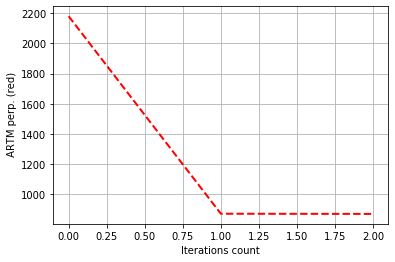

In [51]:
print_measures(model_artm)

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:

phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.757 ARTM)
Sparsity Theta: 0.113 (ARTM)
Kernel contrast: 0.266 (ARTM)
Kernel purity: 0.231 (ARTM)
Perplexity: 486.664 (ARTM)


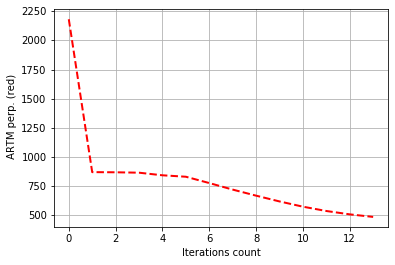

In [55]:
print_measures(model_artm)

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.7))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.2))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=3) 

Sparsity Phi: 0.959 ARTM)
Sparsity Theta: 0.325 (ARTM)
Kernel contrast: 0.401 (ARTM)
Kernel purity: 0.707 (ARTM)
Perplexity: 375.708 (ARTM)


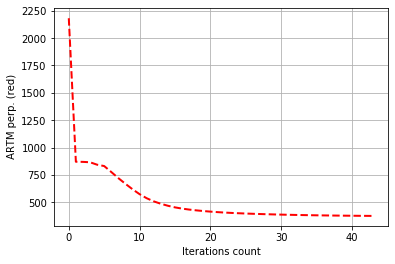

In [59]:
print_measures(model_artm)

Пока что перплексия падает, можно прогнать ещё пару раз, подкрутив параметры разреженности.  

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.3))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=2) 

Sparsity Phi: 0.975 ARTM)
Sparsity Theta: 0.412 (ARTM)
Kernel contrast: 0.450 (ARTM)
Kernel purity: 0.808 (ARTM)
Perplexity: 370.833 (ARTM)


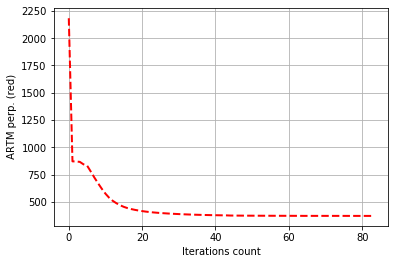

In [64]:
print_measures(model_artm)

In [65]:

for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: 
        continue

topic_0: 
добрый
поезд
окончательно
99
наступать
временно
простор
стороной
превращаться
upd
---------
topic_1: 
процессор
intel
type
00
core
usb
bytes
power
ггц
wifi
---------
topic_2: 
человек
лицо
лекция
социальный
чувствовать
показывать
эмоция
эффект
личность
почему
---------
topic_3: 
открытый
оценка
организация
рамка
ключевой
сообщество
показатель
единый
сбор
оценить
---------
topic_4: 
быстрый
больший
количество
маленький
значительно
увеличение
скорость
значительный
сравнение
занимать
---------
topic_5: 
материал
печать
3d
принтер
деталь
лист
сканирование
изделие
3d-принтер
создание
---------
topic_6: 
читать
фильм
читатель
рейтинг
отзыв
слушать
оформление
впечатление
обсуждать
выпуск
---------
topic_7: 
команда
заказчик
тз
scrum
методология
руководство
командный
исполнитель
выполнить
agile
---------
topic_8: 
1
2
3
up
4
6
days
down
5
active
---------
topic_9: 
теория
принцип
определение
понятие
известный
глава
описывать
математический
термин
математика
---------
topic_10: 
сумма

#Модель 2

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(300)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.3, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 300)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.25, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 300)])
                                    ]
                        )

In [0]:
model_artm.initialize(dictionary=dictionary, )

In [58]:

model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) 
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) 
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1))
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) 

AttributeError: ignored

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 906.196 (ARTM)


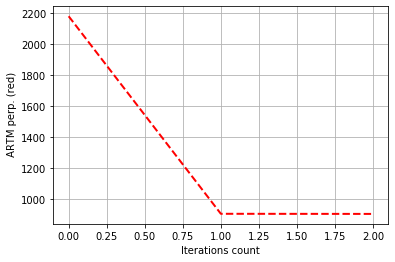

In [42]:
print_measures(model_artm)

In [57]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.1, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 300)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.1, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 300)]))

AttributeError: ignored

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.052 (ARTM)
Kernel contrast: 0.069 (ARTM)
Kernel purity: 0.058 (ARTM)
Perplexity: 628.525 (ARTM)


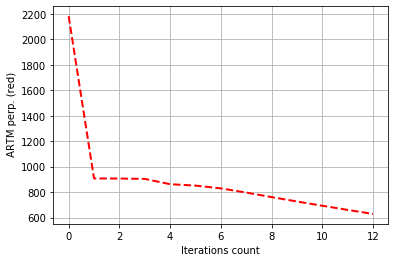

In [46]:
print_measures(model_artm)

Уже после первого прохода регуляризатором перплексия уменьшается, но можно ещё. 

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.3))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.01))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.224 (ARTM)
Kernel contrast: 0.301 (ARTM)
Kernel purity: 0.434 (ARTM)
Perplexity: 373.724 (ARTM)


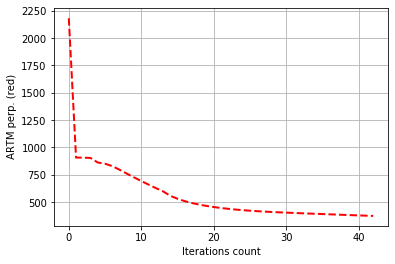

In [48]:
print_measures(model_artm)

И ещё пару раз.

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.2))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.005))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=2)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.376 (ARTM)
Kernel contrast: 0.372 (ARTM)
Kernel purity: 0.690 (ARTM)
Perplexity: 331.857 (ARTM)


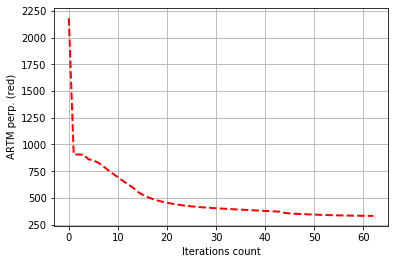

In [50]:
print_measures(model_artm)

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.1))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.005))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=5)

Sparsity Phi: 0.958 ARTM)
Sparsity Theta: 0.427 (ARTM)
Kernel contrast: 0.357 (ARTM)
Kernel purity: 0.804 (ARTM)
Perplexity: 320.610 (ARTM)


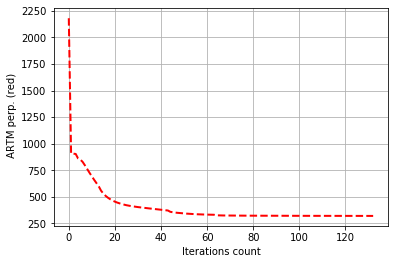

In [54]:
print_measures(model_artm)

Модель сошлась, график практически не меняется. Перплексия снизилась до 320, сильно выросла разреженность.

In [55]:

for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: 
        continue

topic_0: 
конференция
доклад
презентация
выступление
слайд
спикер
александр
встреча
андрей
сергей
---------
topic_1: 
процессор
intel
гб
ноутбук
видеокарта
железо
nvidia
чип
gpu
частота
---------
topic_2: 
сеть
интернет
социальный
сетевой
linkedin
network
сегмент
связь
публичный
подключить
---------
topic_3: 
счёт
рамка
ключевой
эффективный
фактор
показатель
эффективность
связанный
распределение
критерий
---------
topic_4: 
считать
возможно
слишком
действительно
целое
реальный
полностью
скорее
насколько
вероятно
---------
topic_5: 
материал
печать
принтер
3d
сканирование
3d-принтер
сканер
деталь
изделие
печатать
---------
topic_6: 
читать
домашний
помещение
слушать
колонка
обсуждать
бренд
дом
акустик
dolby
---------
topic_7: 
технический
требование
заказчик
задание
тз
документация
исполнитель
предприятие
срок
договор
---------
topic_8: 
2
1
up
6
3
days
down
connection
active
4
---------
topic_9: 
её
форма
выдавать
б
полный
прима
легко
увидеть
похожий
немного
---------
topic_10: 
либо
т

#Ответы

6) Вторая модель выдала результаты получше, хоть и первая тоже ничего.
Несколько тем, извлеённых второй моделью:

topic_39: (Машинное обучение)

обучение

слой

признак

loss

нейронный

acc

обучать

машинный

классификация

выборка


topic_1: (Видеокарты)

процессор

intel

гб

ноутбук

видеокарта

железо

nvidia

чип

gpu

частота


topic_5: (3d-принтеры) 

материал

печать

принтер

3d

сканирование

3d-принтер

сканер

деталь

изделие

печатать





7) Графики обучения приведены в ячейках: 42, 46, 48, 50, 54 
Здесь продублирован финальный


Sparsity Phi: 0.958 ARTM)
Sparsity Theta: 0.427 (ARTM)
Kernel contrast: 0.357 (ARTM)
Kernel purity: 0.804 (ARTM)
Perplexity: 320.610 (ARTM)


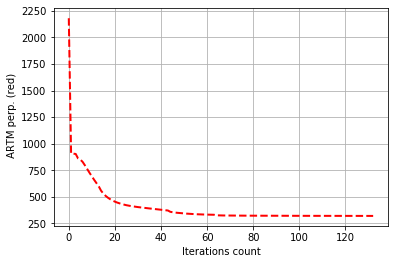

In [56]:
print_measures(model_artm)

8)
Первым делом я немного предобработал словарь. Кроме того, что и так было - убрал некоторые странные токены из получившегося (скорее всего, куски html), повысил трешхолд для н-граммов. На этапе обучения модели сразу добавил сглаживания и декореляцию, повысив tau до 0.3 (первую пробовал с исходным значением, и показалось, что эффект от повышения есть - перплексия падает быстрее, особенно на первых прогонах). Первую модель прогнал 1 раз без разреженности, потом 1 раз немного снизив параметры (и тем, и документов), 3 раза - повысив, и ещё 2 раза - опять понизив. Вторую - 1 раз без разрежения, а затем постпенно понижал показатель разреженности и увелечивал количество итераций (до 5). В итоге, после примерно одинакового количества итераций (3-4) обе модели вышли на плато в районе показателя перплексии в 400, и дальше показатель снижался уже совсем неохотно. У второй он опустился до 320, но у неё и количество итераций было выше, и показатель разреженности значительно меньше.   

В итоге, обе модели выдают как хорошие варианты (достаточно много), так и не очень. Часто определяют не то - например в какой-то теме, извлечённой второй моделью, были английские предлоги, а первая модель выдавала мешанину из глаголов, не особо связанных с какой-то определённой темой, и тему, целиком состоящую из чисел. 
